In [1]:
import cv2

In [2]:
from  matplotlib import pyplot as plt

In [3]:
img = cv2.imread("dog.jpg")[:,:,::-1]

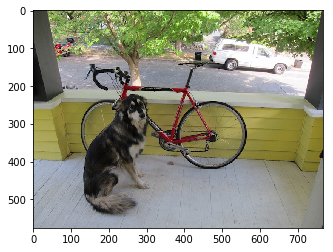

In [4]:
plt.imshow(img)
plt.show()

In [5]:
import requests,json

## 将mat图片转成base64格式

In [6]:
import base64

In [7]:
with open("dog.jpg","rb") as f:
    base64_data = base64.b64encode(f.read())
    s = base64_data.decode()

## 实例分割服务

In [8]:
instance_segm_url = "http://192.168.1.54:5001/object_detect/instance_segm/"
instance_segm_response = requests.post(url=instance_segm_url,json={"img_base64":"data:image/jpg;base64,"+str(s)})

In [9]:
print(instance_segm_response)

<Response [200]>


In [10]:
out_img_base64 = json.loads(instance_segm_response.text)["base64_str"]

In [11]:
img_str = base64.b64decode(out_img_base64)

实例分割图片展示


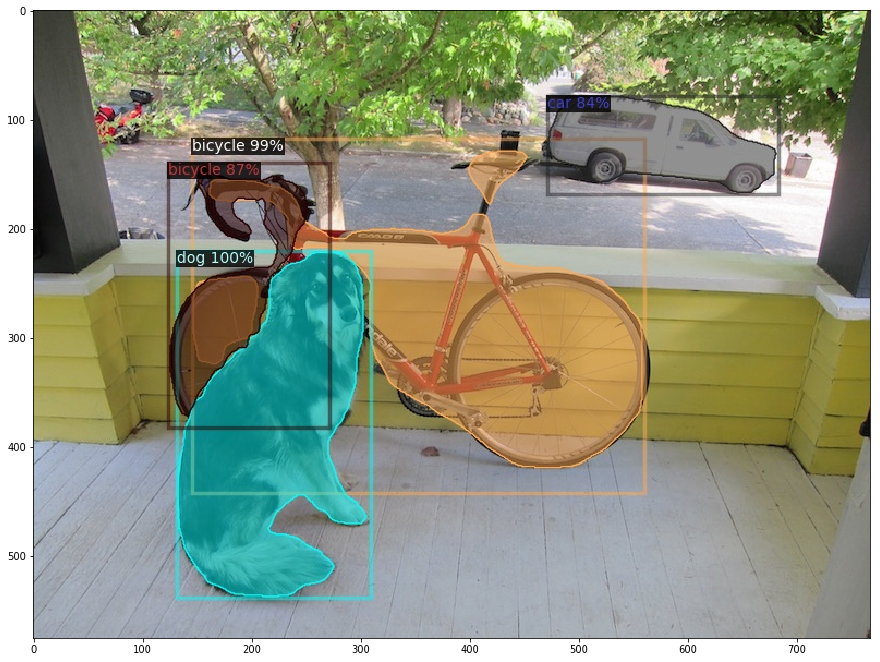

In [12]:
import numpy as np
np_arr = np.frombuffer(img_str,np.uint8)
mat_img = cv2.imdecode(np_arr,cv2.IMREAD_COLOR)[:,:,::-1]
plt.figure(figsize=(15,15))
plt.imshow(mat_img)
print("实例分割图片展示")
plt.show()

## 人体关键点检测服务

In [13]:
key_point_url = "http://192.168.1.54:5001/object_detect/key_points/"

In [14]:
with open ("point01.jpg","rb") as f:
    base64_data = base64.b64encode(f.read())
    point_img_base64 = base64_data.decode()

In [15]:
key_point_response = requests.post(url=key_point_url,json={"img_base64":"data:image/jpg;base64,"+str(point_img_base64)})

In [16]:
key_point_response

<Response [200]>

In [17]:
key_point_img = base64.b64decode(json.loads(key_point_response.text)["base64_str"])

人体关键点检测图片展示


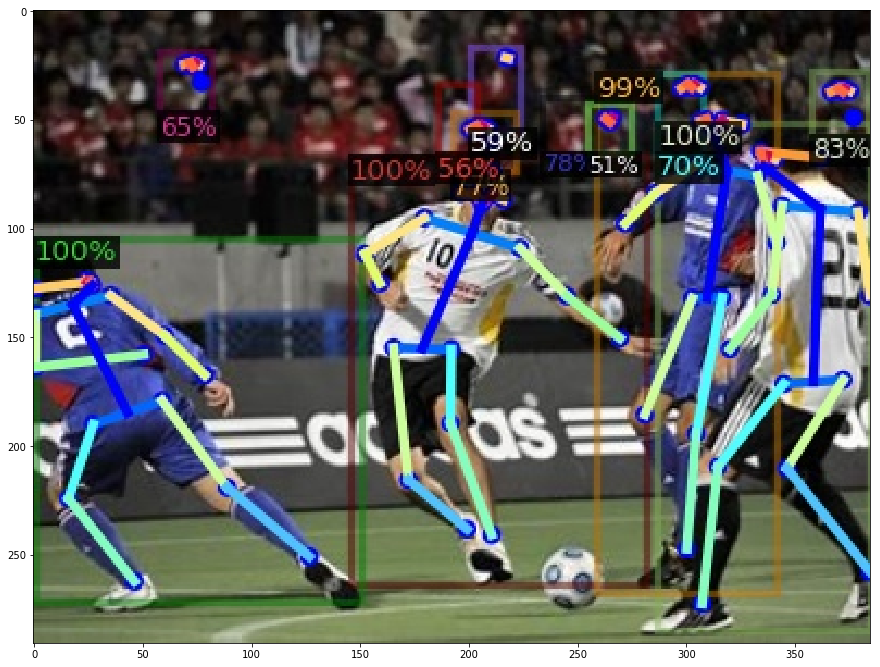

In [18]:
import numpy as np
np_arr = np.frombuffer(key_point_img,np.uint8)
mat_img = cv2.imdecode(np_arr,cv2.IMREAD_COLOR)[:,:,::-1]
plt.figure(figsize=(15,15))
plt.imshow(mat_img)
print("人体关键点检测图片展示")
plt.show()

## 全景分割服务

In [19]:
panoramic_segm_url = "http://192.168.1.54:5001/object_detect/panoramic_segm/"

In [20]:
with open ("hourse01.jpg","rb") as p:
    base64_data = base64.b64encode(p.read())
    panoramic_img_base64 = base64_data.decode()

In [21]:
panoramic_img_response=requests.post(url=panoramic_segm_url,json={"img_base64":"data:image/jpg;base64,"+str(panoramic_img_base64)})

In [22]:
panoramic_img = base64.b64decode(json.loads(panoramic_img_response.text)["base64_str"])

全景分割图片展示


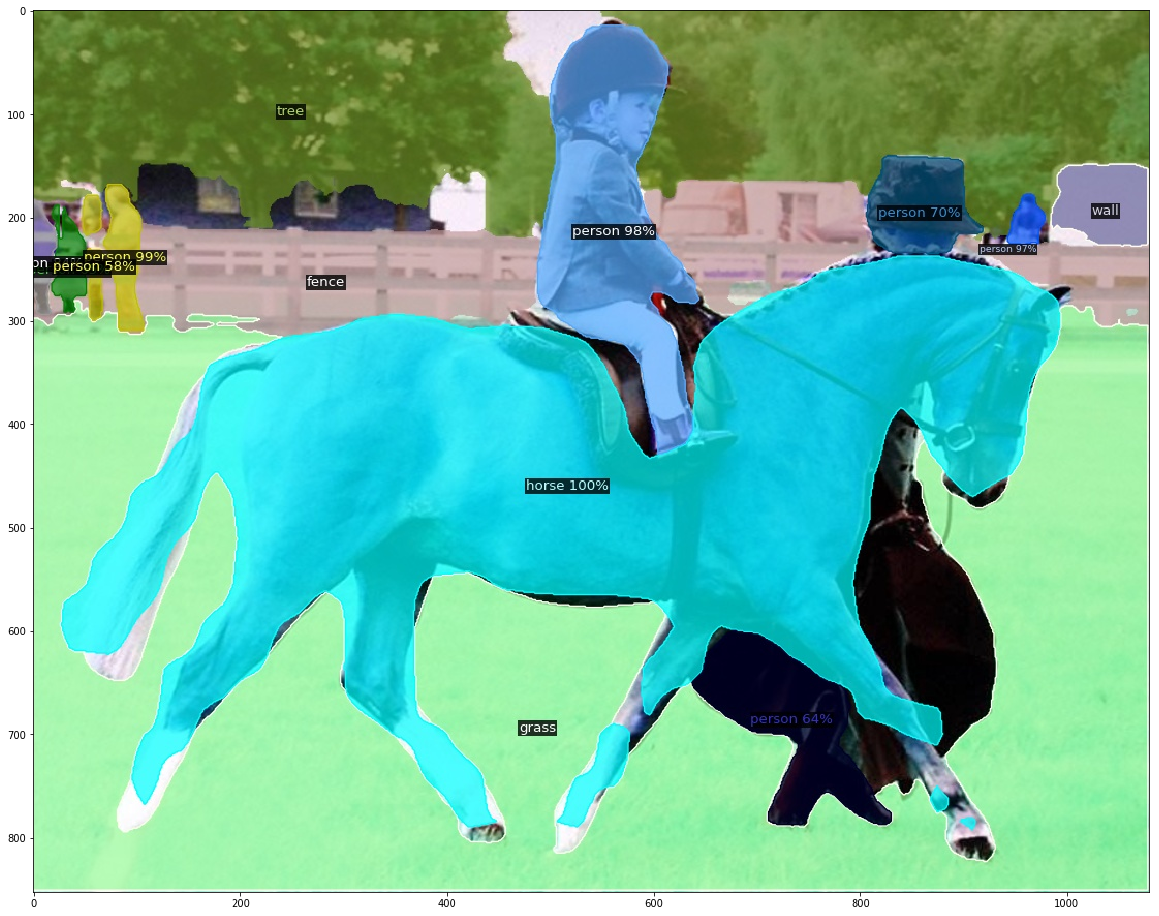

In [23]:
import numpy as np
np_arr = np.frombuffer(panoramic_img,np.uint8)
mat_img = cv2.imdecode(np_arr,cv2.IMREAD_COLOR)[:,:,::-1]
plt.figure(figsize=(20,20))
plt.imshow(mat_img)
print("全景分割图片展示")
plt.show()

## 口罩佩戴检测

In [24]:
from ipywebrtc import CameraStream

In [28]:
# 调用前置摄像头
camera = CameraStream.facing_user(audio=False)
camera

CameraStream(constraints={'audio': False, 'video': {'facingMode': 'user'}})

In [29]:
# 摄像头图片截取
from ipywebrtc import ImageRecorder
from PIL import Image
import io
import PIL
image_recorder = ImageRecorder(stream=camera)
image_recorder

ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'audio': False, 'video': {'facingMode':…

In [30]:
import base64
try:
    im = Image.open(io.BytesIO(image_recorder.image.value)).convert("RGB")
except (OSError):
    pass
out_buffer = io.BytesIO()
# _im = Image.new("RGB",im.size,(255,255,155))
im.save(out_buffer,format="JPEG")
byte_data = out_buffer.getvalue()
base64_data = base64.b64encode(byte_data)
point_img_base64 = base64_data.decode()

In [31]:
mask_detect_url = "http://192.168.1.54:5001/object_detect/mask_detect/"
mask_detect_response = requests.post(url=mask_detect_url,json={"img_base64":"data:image/jpg;base64,"+str(point_img_base64)})

In [32]:
mask_detect_response

<Response [200]>

口罩佩戴检测图片


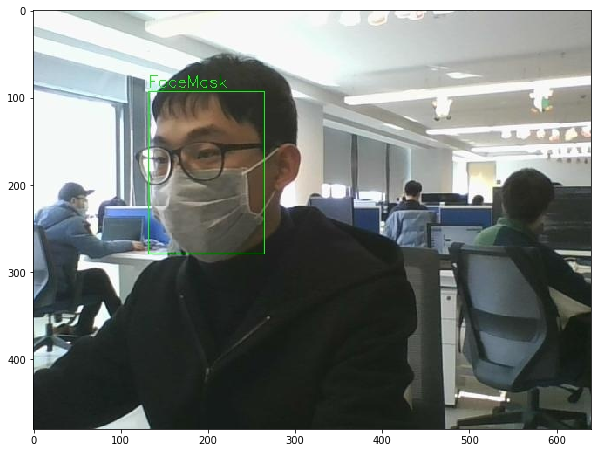

In [33]:
import numpy as np
import cv2
np_arr = np.frombuffer(base64.b64decode(json.loads(mask_detect_response.text)["base64_str"]),np.uint8)
mat_img = cv2.imdecode(np_arr,cv2.IMREAD_COLOR)[:,:,::-1]
plt.figure(figsize=(10,10))
plt.imshow(mat_img)
print("口罩佩戴检测图片")
plt.show()